In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline
from scipy.stats import randint
seed = 330
np.random.seed(seed)

In [7]:
pwd

'/Users/mattpucci/Desktop'

In [8]:
cd /Users/mattpucci/Desktop

/Users/mattpucci/Desktop


In [5]:
ls

2012-18_officialBoxScore.csv
2012-18_playerBoxScore.csv
2012-18_standings.csv
2012-18_teamBoxScore.csv
2016-17_officialBoxScore.csv
2016-17_playerBoxScore.csv
2016-17_standings.csv
2016-17_teamBoxScore.csv
2017-18_officialBoxScore.csv
2017-18_playerBoxScore.csv
2017-18_standings.csv
2017-18_teamBoxScore.csv
Cover Letter.docx
Cover Letter.pdf
Matthew Pucci - Resume .pdf
RCdata/
RESUME - Matt Pucci .pdf
Restaurant Project Data/
Screen Shot 2020-03-25 at 4.47.23 PM.png
Screen Shot 2020-03-30 at 3.37.57 PM.png
Word Doc Cover Letter.docx
eight.csv
five.csv
four.csv
nine.csv
one.csv
seven.csv
six.csv
teamBoxScore.csv
three.csv
two.csv


# Let's take an exploratory look at the NBA 2012-2018 team box score dataset. 

In [14]:
df= pd.read_csv('2012-18_teamBoxScore.csv')
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,...,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790


In [53]:
df.columns

Index(['gmDate', 'gmTime', 'seasTyp', 'offLNm1', 'offFNm1', 'offLNm2',
       'offFNm2', 'offLNm3', 'offFNm3', 'teamAbbr',
       ...
       'opptFIC40', 'opptOrtg', 'opptDrtg', 'opptEDiff', 'opptPlay%', 'opptAR',
       'opptAST/TO', 'opptSTL/TO', 'poss', 'pace'],
      dtype='object', length=123)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14758 entries, 0 to 14757
Columns: 123 entries, gmDate to pace
dtypes: float64(50), int64(54), object(19)
memory usage: 13.8+ MB


In [24]:
df.isna().sum()

gmDate        0
gmTime        0
seasTyp       0
offLNm1       0
offFNm1       0
             ..
opptAR        0
opptAST/TO    0
opptSTL/TO    0
poss          0
pace          0
Length: 123, dtype: int64

In [48]:
df.offLNm1.value_counts()

Richardson      568
Kirkland        538
Foster          518
Zielinski       508
Goble           472
               ... 
Palmer           36
Capers           20
Voyard-Tadal     18
Roe               6
Poole             6
Name: offLNm1, Length: 68, dtype: int64

In [49]:
df.offLNm2.value_counts()

Richardson    414
Guthrie       408
Collins       406
Crawford      404
Smith         394
             ... 
Rush           28
Fehr           16
Myers           6
Ransom          6
Bavetta         4
Name: offLNm2, Length: 69, dtype: int64

In [50]:
df.offLNm3.value_counts()

Taylor          582
Capers          514
Blair           480
Maddox          450
Scott           426
               ... 
Voyard-Tadal      6
Goldenberg        6
Conner            6
Kissinger         4
Jones             2
Name: offLNm3, Length: 76, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc529a9c3d0>,
      dtype=object)

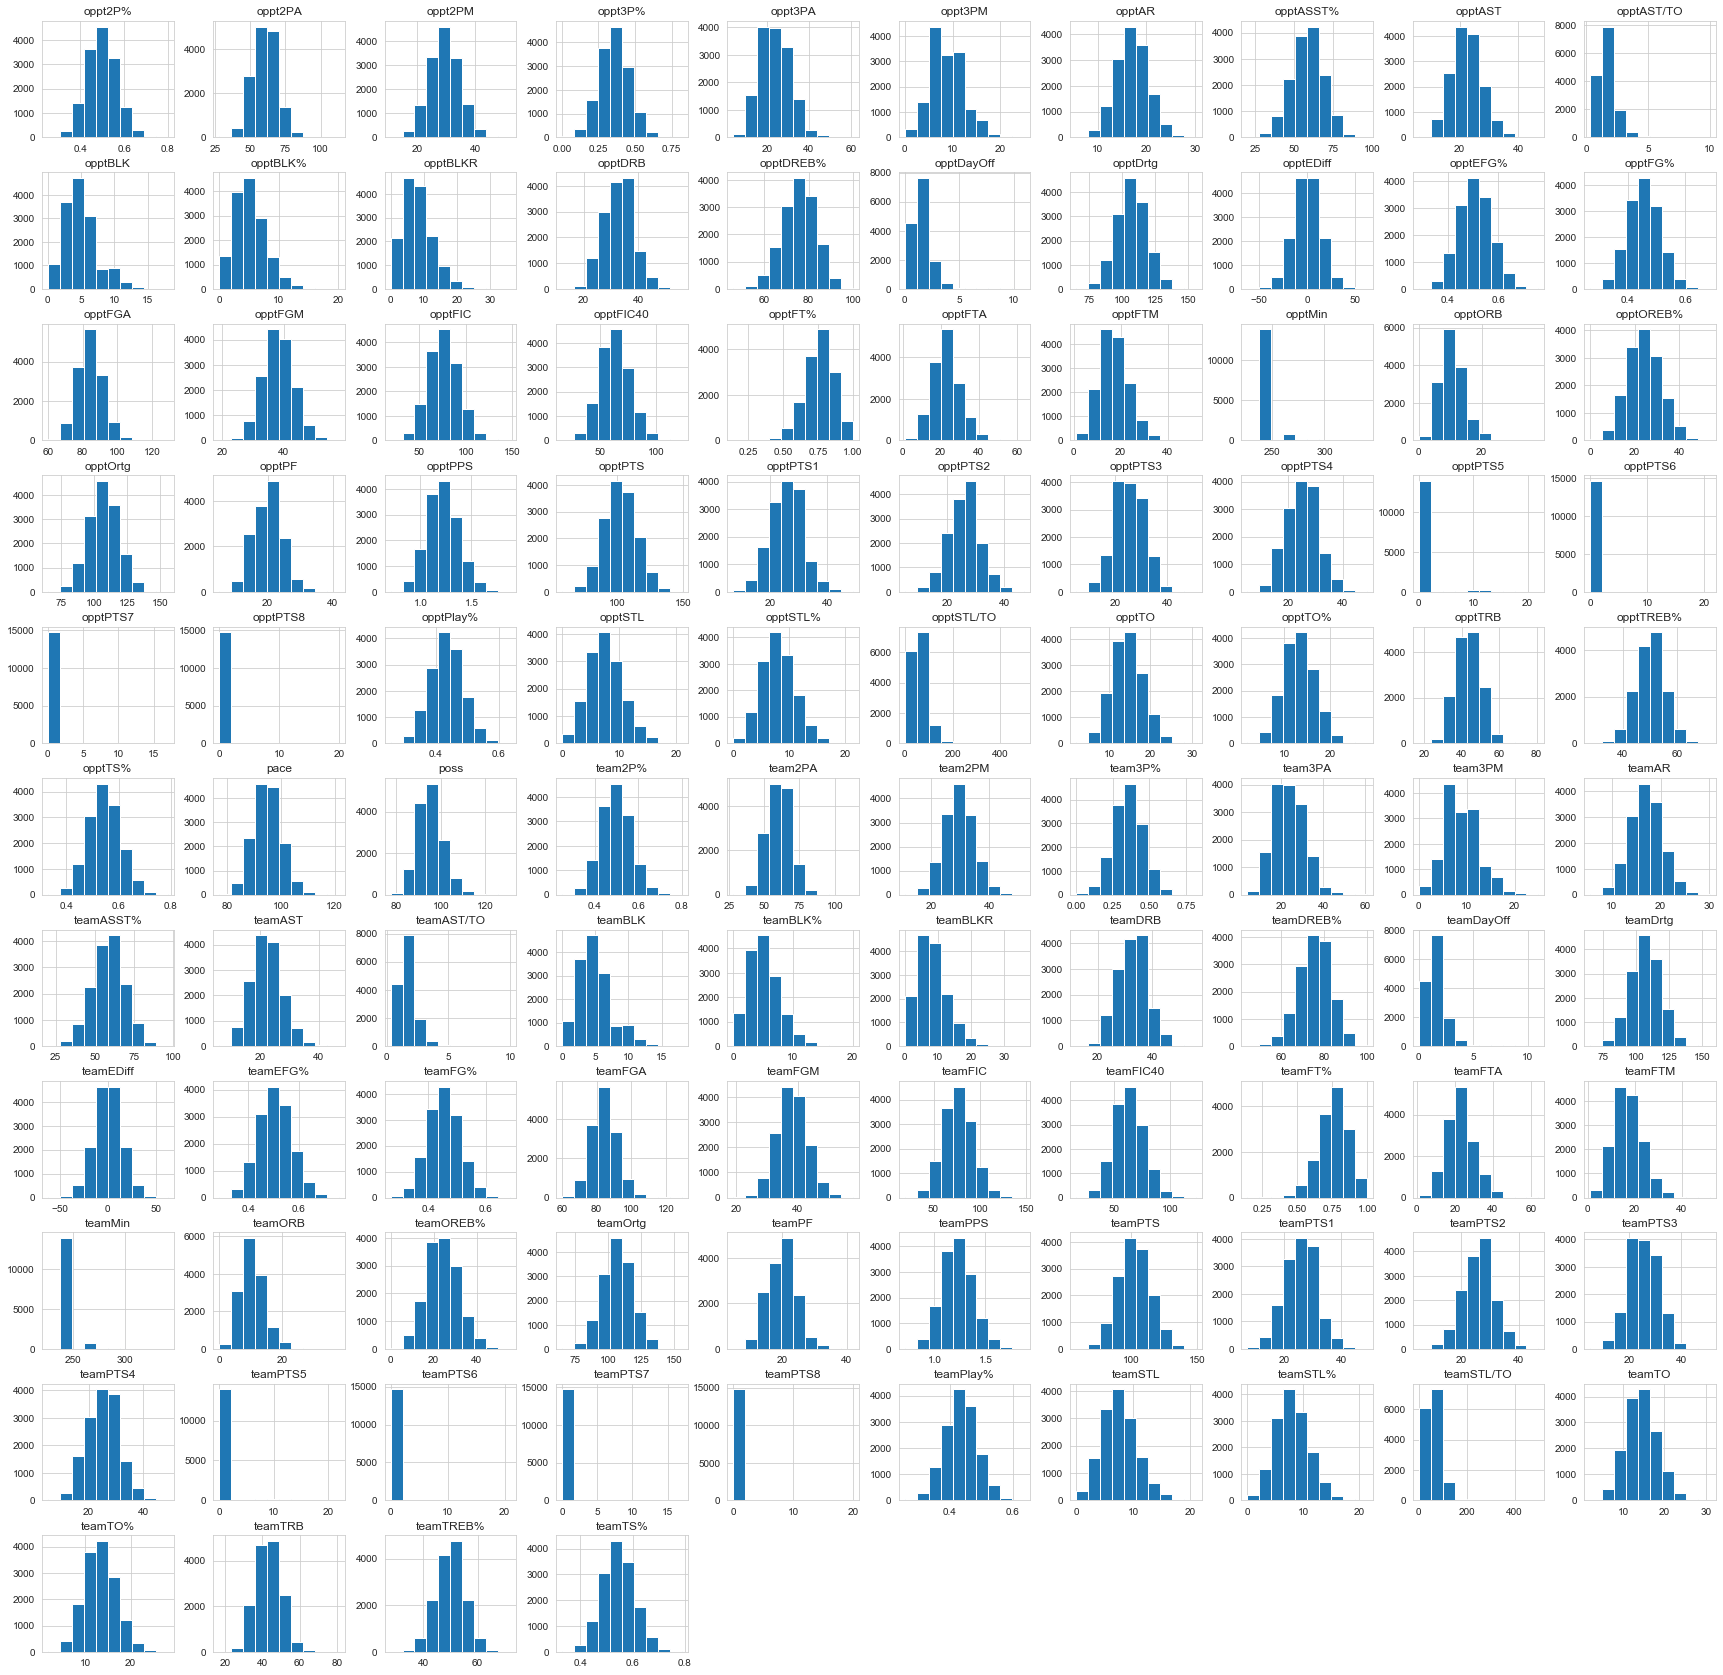

In [52]:
df.hist(figsize=(30,30))

## All the data looks standardly distributed.  Let's now check and see if there are any strong correlations.

Text(0.5, 1, 'Figure 1: Seaborn Data Correlation Heat Map')

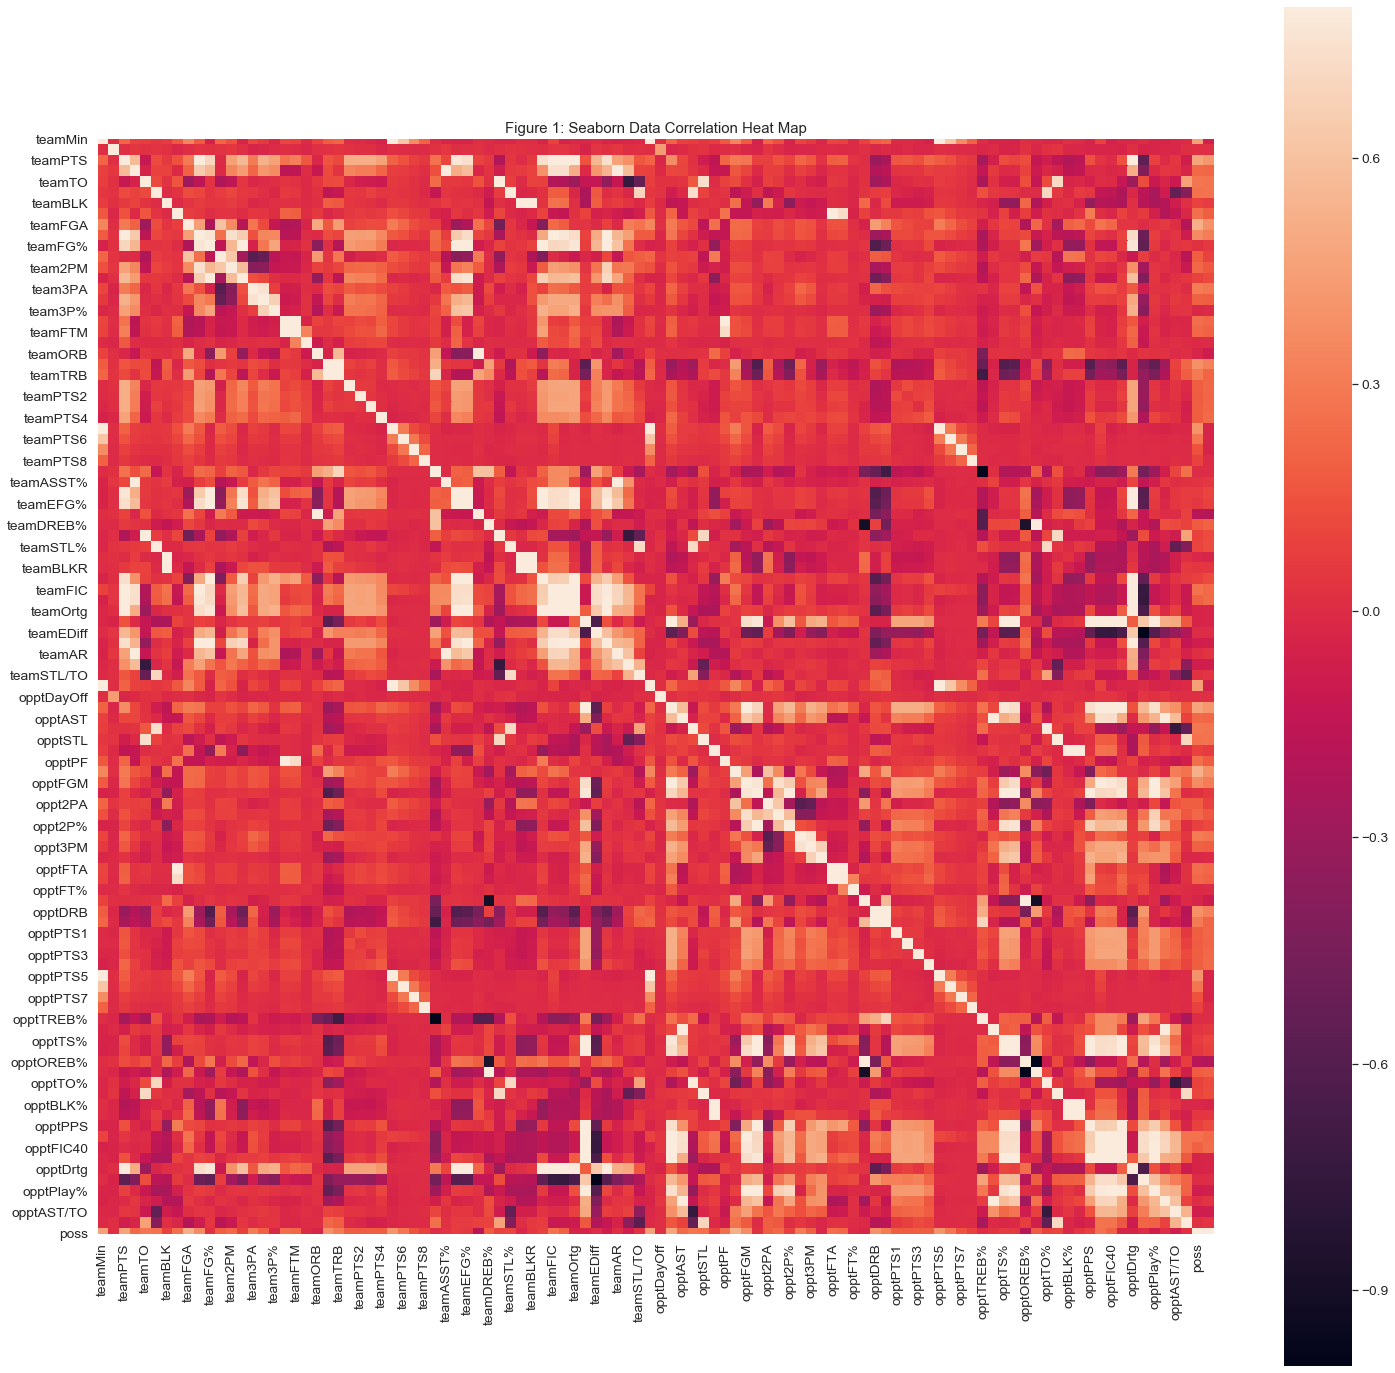

In [93]:
df_corr = df.corr()
f, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_corr, vmax=.8, square=True).set_title('Figure 1: Seaborn Data Correlation Heat Map') 

### There is far too much going on in the above visual to make good sense of it.  Let's take a look at the 10 highest correlated features with more clarity.  

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import pickle

In [95]:
df.teamRslt.value_counts()

0    7379
1    7379
Name: teamRslt, dtype: int64

In [96]:
df.teamRslt=df.teamRslt.map(lambda x: '0' if x=='Loss' else x)

In [97]:
df.teamRslt=df.teamRslt.map(lambda x: '1' if x=='Win' else x)

In [98]:
#Above we just converted a Loss to a value of 0, with a win a value of 1.

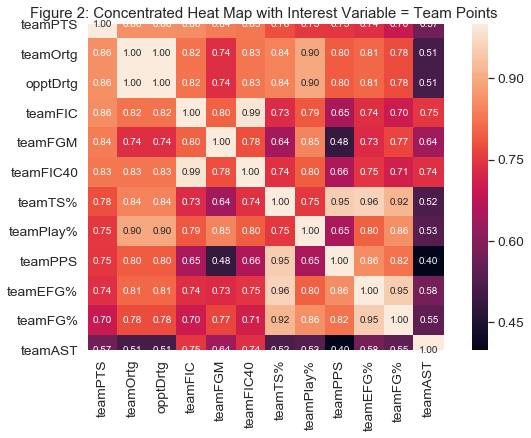

<Figure size 1800x1800 with 0 Axes>

In [100]:
k = 12
cols = df_corr.nlargest(k, 'teamPTS')['teamPTS'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Points ")
plt.figure(figsize=(25,25))
plt.show()

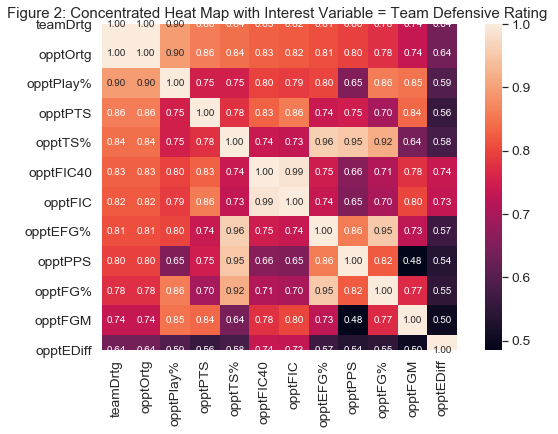

<Figure size 1800x1800 with 0 Axes>

In [117]:
k = 12
cols = df_corr.nlargest(k, 'teamDrtg')['teamDrtg'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Defensive Rating ")
plt.figure(figsize=(25,25))
plt.show()

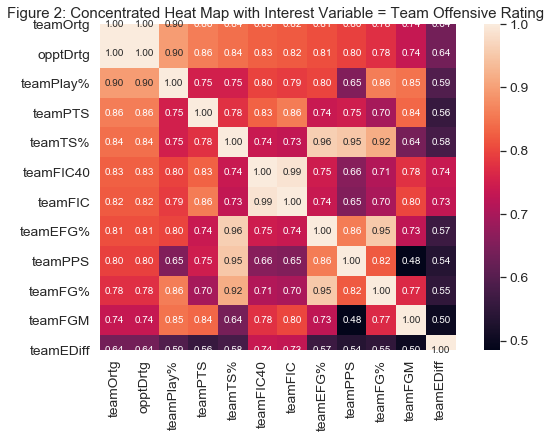

<Figure size 1800x1800 with 0 Axes>

In [118]:
k = 12
cols = df_corr.nlargest(k, 'teamOrtg')['teamOrtg'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Offensive Rating ")
plt.figure(figsize=(25,25))
plt.show()

In [205]:
feature_cols = ['opptPTS', 'teamDrtg', 'teamPF', 'teamTO', 'teamORB', 'teamFGA','teamFGM']
x = df[feature_cols]
y = df['teamRslt']
x.head()

,opptPTS,teamDrtg,teamPF,teamTO,teamORB,teamFGA,teamFGM
0,94,105.6882,19,13,18,90,32
1,84,94.4447,21,21,18,79,36
2,120,126.3381,23,16,7,75,39
3,107,112.6515,20,8,5,79,43
4,91,99.3678,25,12,9,85,40


In [206]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.4, random_state=2)

In [207]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8854, 7)
(5904, 7)
(8854,)
(5904,)


In [208]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, pred))
print(knn.predict_proba(x_test))

0.8670392953929539
[[0.  1. ]
 [1.  0. ]
 [1.  0. ]
 ...
 [0.  1. ]
 [0.2 0.8]
 [1.  0. ]]


In [224]:
important_stats = df.drop(['offLNm1', 'offFNm1', 'offLNm2',
       'offFNm2', 'offLNm3', 'offFNm3','gmDate','gmTime', 'seasTyp'],axis=1)
target = df.teamRslt
target.columns = ['teamRslt']

In [209]:
clf = LinearSVC(random_state=2)
clf.fit(x_train, y_train)
print(clf.coef_)
print(clf.intercept_)
pred = (clf.predict(x_test))
#print(pred)
print(metrics.accuracy_score(y_test, pred))

[[-0.03142627 -0.03467208  0.00874728 -0.02435568  0.03656773 -0.0419889
   0.20514026]]
[3.16010451]
0.7339092140921409


In [243]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [244]:
print(clf.feature_importances_)

[0.19992602 0.25553899 0.05416384 0.06326379 0.05763771 0.0849721
 0.28449755]


In [245]:
pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, pred))

0.8606029810298103


In [246]:
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
clfgtb.score(x_test, y_test)

0.8956639566395664

In [225]:
df.teamAbbr = df.teamAbbr.astype('category')
df.teamConf = df.teamConf.astype('category')
df.teamDiv = df.teamDiv.astype('category')
df.teamLoc = df.teamLoc.astype('category')

# Now that our features are category variables, lets assign some dummie data to represent them.
teamAbbr = pd.get_dummies(df.teamAbbr, prefix='Team Abbreviation', drop_first=True)
teamConf = pd.get_dummies(df.teamConf, prefix='grade', drop_first=True)
teamDiv = pd.get_dummies(df.teamDiv, prefix='zipcode', drop_first=True)
teamLoc = pd.get_dummies(df.teamLoc, prefix='bedrooms', drop_first=True)

# Add our transformed variables to the data set and remove the originals.
df = df.join([teamAbbr, teamConf, teamDiv, teamLoc])

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14758 entries, 0 to 14757
Columns: 159 entries, gmDate to bedrooms_Home
dtypes: category(4), float64(50), int64(54), object(15), uint8(36)
memory usage: 14.0+ MB


In [230]:
X_1, y_1 = df[[x for x in df.columns if x != 'teamRslt']], df[['teamRslt']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=123)

X_2, y_2 = df1[[x for x in df1.columns if x != 'teamRslt']], df1[['teamRslt']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size = 0.2, random_state=123)

In [238]:
print(X_train.shape)
print(y_train.shape)

(11068, 6)
(8854,)


In [235]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

ValueError: Found input variables with inconsistent numbers of samples: [11068, 8854]

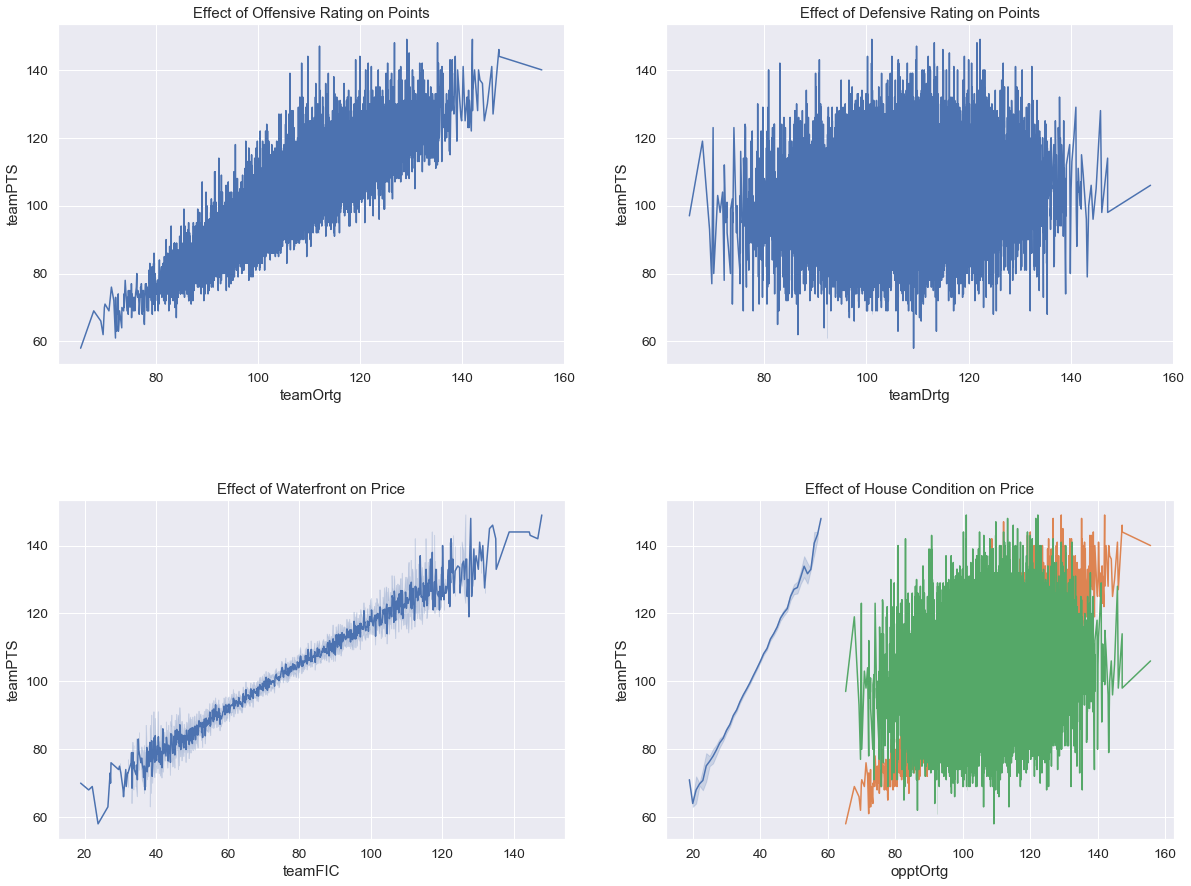

In [114]:
plt.figure(figsize=(20,15))

plt.subplot(221)
sns.lineplot(df.teamOrtg, df.teamPTS)
plt.title('Effect of Offensive Rating on Points')
plt.subplot(222)
sns.lineplot(df.teamDrtg, df.teamPTS)
plt.title('Effect of Defensive Rating on Points')
plt.subplot(223)
sns.lineplot(df.teamFIC, df.teamPTS)
plt.title('Effect of Waterfront on Price')
plt.subplot(224)
sns.lineplot(df.teamFGM, df.teamPTS)
plt.title('Effect of House Condition on Price')
sns.lineplot(df.opptDrtg, df.teamPTS)
plt.title('Effect of House Condition on Price')
sns.lineplot(df.opptOrtg, df.teamPTS)
plt.title('Effect of House Condition on Price')

plt.subplots_adjust(hspace=0.40)
sns.set_style('darkgrid')
sns.color_palette('pastel')
plt.show()

In [113]:
df('opptDayOff').value_count()

TypeError: 'DataFrame' object is not callable

In [247]:
pwd

'/Users/mattpucci/Desktop'